In [4]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics

In [6]:
corona=pd.read_csv('corona.csv')

In [7]:
corona

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [37]:
corona['Country']=le.fit_transform(corona['Country'])
corona

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-22,1,0,0,0
2,2020-01-22,2,0,0,0
3,2020-01-22,3,0,0,0
4,2020-01-22,4,0,0,0
...,...,...,...,...,...
23683,2020-05-26,183,429,365,3
23684,2020-05-26,184,9,6,1
23685,2020-05-26,185,249,10,49
23686,2020-05-26,186,920,336,7


In [38]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  int32 
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 832.9+ KB


In [39]:
corona.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


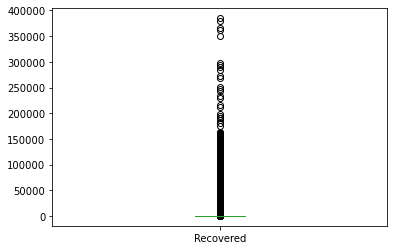

In [40]:
corona['Recovered'].plot.box()

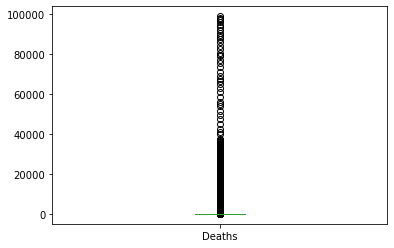

In [41]:
corona['Deaths'].plot.box()

Confirmed       AxesSubplot(0.125,0.125;0.168478x0.755)
Recovered    AxesSubplot(0.327174,0.125;0.168478x0.755)
Deaths       AxesSubplot(0.529348,0.125;0.168478x0.755)
dtype: object

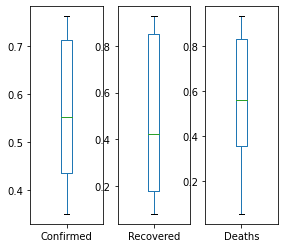

In [53]:
corona.plot(kind='box',subplots=True, layout=(1,4))

In [45]:
corona.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

   Confirmed  Recovered    Deaths
0   0.419157   0.828008  0.508996
1   0.478532   0.525734  0.052490
2   0.690739   0.855280  0.400541
3   0.762908   0.161833  0.340055
4   0.484650   0.229402  0.161139
5   0.349451   0.315678  0.856472
6   0.621232   0.926331  0.887622
7   0.738787   0.860244  0.931821
8   0.372440   0.080889  0.748609
9   0.721520   0.108773  0.608898


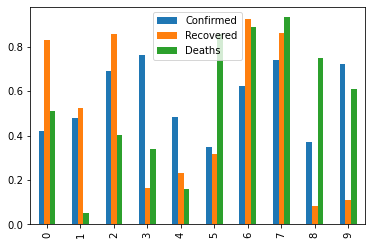

In [46]:
corona=pd.DataFrame(np.random.rand(10,3),columns=['Confirmed','Recovered','Deaths'])
print(corona)
corona.plot.bar()

In [47]:
corona.isnull().sum()

Confirmed    0
Recovered    0
Deaths       0
dtype: int64

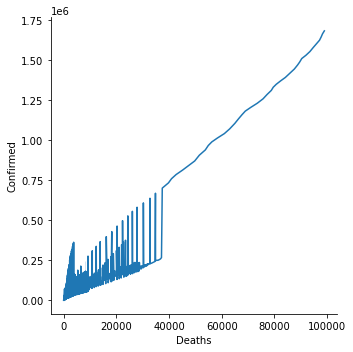

In [31]:
sns.relplot(x='Deaths', y='Confirmed' , kind='line', data=corona)

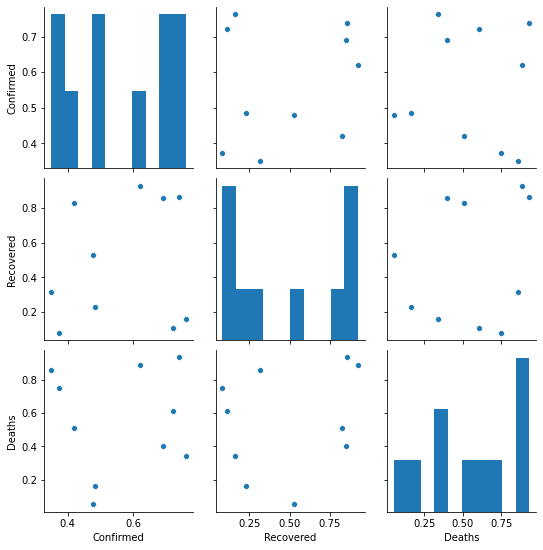

In [49]:
sns.pairplot(corona)

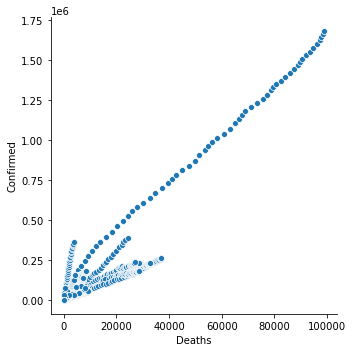

In [28]:
sns.relplot(x='Deaths',y='Confirmed', data=corona)

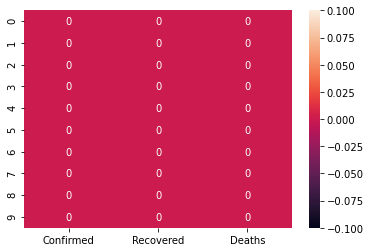

In [51]:
import seaborn as sns
sns.heatmap(corona.isnull(),annot=True)
plt.show()

In [52]:
from scipy.stats import zscore
z_score=abs(zscore(corona))
print(corona.shape)
corona_final=corona.loc[(z_score<3).all(axis=1)]
print(corona_final.shape)

(10, 3)
(10, 3)


In [11]:
x=corona[['Confirmed']]
y=corona[['Deaths']]

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score=0
for r_state in range(42,101):
    x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr= linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print ('r2_score corresponding to random state: ',r_state,' is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_score
        final_r_state=r_state
print()
print()
print('max r2 score is corresponding to',final_r_state,'is: ',max_r_score)

r2_score corresponding to random state:  42  is: 0.8822592270045335
r2_score corresponding to random state:  43  is: 0.8583574296459603


TypeError: '>' not supported between instances of 'float' and 'function'

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x,y, cv=5, scoring='r2').mean()

0.08630490092427323

In [19]:
x_train, x_test , y_train, y_test =train_test_split(x,y, random_state = 50, test_size= 0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('r2 score is:' ,r2_score(y_test,y_pred))
print ('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: 0.8950626975465225
RMSE is:  1524.3950065025404
